In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X_train_dep = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\X_train_dep.csv',index_col=0)

X_test_dep = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\X_test_dep.csv',index_col=0)

y_train_dep_df = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\y_train_dep_df.csv',index_col=0)

y_test_d_df  = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\y_test_dep_df.csv',index_col=0)

In [3]:
y_train_dep_df.head()

,y_label
39336,False
25184,False
34484,False
25237,False
16170,False


In [4]:
def proc_freq(df,variable_):  #Note variable_ must be given in quotes example: variable_ = 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(2),
        'Cumulative_Frequency': datax.values.cumsum(),
        'Cumulative_Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(2)   })
    
    #datay.set_index(variable_)
    #return(datay.set_index(variable_))
    return(datay)

In [5]:
print('y_train')
proc_freq(y_train_dep_df,'y_label')

y_train


,y_label,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,False,25973,92.76,25973,92.76
1,True,2027,7.24,28000,100.00


In [6]:
print('y_test')
proc_freq(y_test_d_df,'y_label')

y_test


,y_label,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,False,11131,92.76,11131,92.76
1,True,869,7.24,12000,100.00


In [7]:
X_train_dep.describe()

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
count,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000
mean,40.565071,850.970464,16.060679,230.337893,2.476179,0.233964,0.034857,0.027107,0.204643,0.035857,...,0.131214,0.000321,0.055464,0.029536,0.159321,0.118964,0.007036,0.339071,0.090464,0.002036
std,9.585047,1099.958199,8.284130,175.605522,1.637254,0.423357,0.183421,0.162399,0.403448,0.185937,...,0.337641,0.017926,0.228888,0.169306,0.365982,0.323752,0.083585,0.473403,0.286851,0.045074
min,19.000000,-1818.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,53.000000,9.000000,99.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,406.000000,17.000000,174.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1308.000000,21.000000,313.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,70.000000,3216.000000,31.000000,632.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def corr_matrix(df_X):
    df_corrs = df_X.corr()
    upper = df_corrs.where(np.triu(np.ones(df_corrs.shape),k=1).astype(bool))

    sns.set(font_scale=15)
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.heatmap(upper,cmap='RdBu',center=0,annot=True);#cmap='Blues' center=0 vmin=-1,vmax=1 cmap='RdBu'

### check for multicollinearity

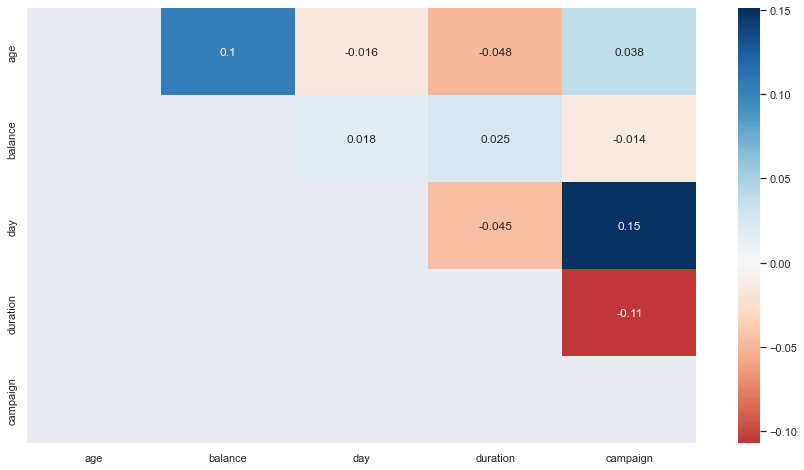

In [9]:
corr_matrix(X_train_dep[['age', 'balance', 'day', 'duration', 'campaign']])

In [10]:
X_train_dep.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
39336,30,admin,single,secondary,no,2,yes,no,telephone,18,...,0,0,0,0,0,0,0,1,0,0
25184,36,services,single,secondary,no,1482,yes,no,cellular,18,...,0,0,0,0,0,0,0,0,1,0
34484,35,blue-collar,married,primary,no,147,yes,no,cellular,5,...,0,0,0,0,0,0,0,1,0,0
25237,33,management,married,secondary,no,480,yes,no,cellular,18,...,0,0,0,0,0,0,0,0,1,0
16170,46,blue-collar,married,secondary,no,209,yes,no,cellular,22,...,0,0,0,0,1,0,0,0,0,0
9910,37,admin,married,secondary,no,439,no,no,unknown,9,...,0,0,0,0,0,1,0,0,0,0
6955,29,management,divorced,tertiary,no,415,yes,yes,unknown,28,...,0,0,0,0,0,0,0,1,0,0
11312,37,blue-collar,single,primary,no,3216,yes,no,unknown,18,...,0,0,0,0,0,1,0,0,0,0
21662,43,technician,married,secondary,no,0,no,no,cellular,19,...,1,0,0,0,0,0,0,0,0,0
9269,58,blue-collar,married,secondary,no,266,yes,no,unknown,5,...,0,0,0,0,0,1,0,0,0,0


In [12]:
lst_categ = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month']

### Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

### drop categoricals 

In [13]:
X_train_dep = X_train_dep.drop(['job', 'marital', 'education', 'default',  'housing','loan','contact','month'], axis=1)

In [14]:
X_test_dep = X_test_dep.drop(['job', 'marital', 'education', 'default',  'housing','loan','contact','month'], axis=1)

In [15]:
X_train_dep.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct'],
      dtype='object')

In [16]:
X_test_dep.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct'],
      dtype='object')

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.metrics import accuracy_score



In [44]:
def to_keep(mod, amt):
    mod = mod['model_importances']
    keeps1 = mod.loc[mod['abs_val'] > amt,['features']]
    list_keeps1 = list(keeps1.features)
    return list_keeps1

In [41]:
#     test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

def cm_infor(mod):
    tn, fp, fn, tp = mod['confusion_matrix_test'].ravel() #from sklearn documentation
    
    recall = tp/(tp +fn)
    specificity = tn / (tn + fp)
    accuracy = (tp+tn)/(tp + tn + fp + fn)
    precision = tp/(tp + fp)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    print('recall = ',recall)
    print('specificity = ',specificity)
    print('accuracy = ',accuracy)
    print('precision = ',precision)
    print('F1 score = ', F1)

In [45]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# updated 5-6-2024

def classx_gs2(
# includes KS satistic
#     model=  LogisticRegression(solver = 'saga', class_weight='balanced', max_iter=500),
model = None,
x_train = None,
x_test =  None,
y_train = None,
y_test =  None,
params = None,
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 3,
scoring = "accuracy",
logistic_reg = None,
tree_based = None):
    ###############################################################################
    
    features = list(x_train.columns)

    ss = StandardScaler()
    x_train = pd.DataFrame(ss.fit_transform(x_train), columns = features)
    x_test = pd.DataFrame(ss.fit_transform(x_test), columns = features)

    skfold = StratifiedKFold(n_splits= splits, shuffle=True, random_state=0)

    gs = GridSearchCV(model, params, cv=skfold,  return_train_score=True, refit=True, scoring=scoring)
    gs.fit(x_train,y_train)
    gs.best_params_

    class_dict = {}
    model= gs.best_estimator_
    class_dict['mod'] = model
    ###################################    

    print('best params: ',gs.best_params_)
    class_dict['best params'] = gs.best_params_

    print('score: ',gs.score(x_train,y_train))
    class_dict['score'] = gs.score(x_train,y_train)

    print('  ')
    print('test score: ',gs.score(x_test,y_test))
    class_dict['test score'] = gs.score(x_test,y_test)
    print(' ')
    from sklearn.metrics import confusion_matrix

    train_pred = gs.best_estimator_.predict(x_train)

    print('confusion matrix train')
    print(confusion_matrix(y_train, train_pred))
    
    class_dict['confusion_matrix_train'] = confusion_matrix(y_train, train_pred)
    print(' ')
#     print('Train classification_report')
#     print(' ')
#     print(classification_report(y_train,train_pred))
#     class_dict['Train classification_report'] = classification_report(y_train,train_pred)

    print(' ')

    
    
    test_pred = gs.best_estimator_.predict(x_test)
    print(' ')
    print('confusion matrix test')
    print(confusion_matrix(y_test, test_pred))
    class_dict['confusion_matrix_test'] = confusion_matrix(y_test, test_pred)
    print(' ')
#     print('Test classification_report')
#     class_dict['Test classification_report'] = classification_report(y_test,test_pred)
#     print()
#     print(classification_report(y_test,test_pred))
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    
#     # Extract TP, FP, TN, FN counts
#     TP = confusion_matrix_test[1, 1]  # True Positives
#     FP = confusion_matrix_test[0, 1]  # False Positives
#     TN = confusion_matrix_test[0, 0]  # True Negatives
#     FN = confusion_matrix_test[1, 0]  # False Negatives
    
#     # Calculate Precision
#     test_precision = TP / (TP + FP)

#     # Calculate Recall
#     test_recall = TP / (TP + FN)

#     # Calculate Specificity
#     test_specificity = TN / (TN + FP)

#     # Calculate F1 Score
#     test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    
#     print('report for test data')
    
#     print("Precision =", round(test_precision, 4))
#     print("Recall =", round(test_recall, 4))
#     print("Specificity =", round(test_specificity, 4))
#     print("F1 Score =",round(test_f1_score, 4) )

    print(' ')
    
    print("train roc_auc_score: ", roc_auc_score(y_train, gs.predict_proba(x_train)[:,1]))
    
    class_dict['train_roc_auc_score'] = roc_auc_score(y_train, gs.predict_proba(x_train)[:,1])
    class_dict['predicted_probabilities_1_train']  = gs.predict_proba(x_train)[:,1]
    
    print(' ')
    
    print("test_roc_auc_score: ", roc_auc_score(y_test, gs.predict_proba(x_test)[:,1]))
    
    class_dict['test_roc_auc_score'] = roc_auc_score(y_test, gs.predict_proba(x_test)[:,1])

    class_dict['predicted_probabilities_1_test'] = gs.predict_proba(x_test)[:,1]
    
    print(' ')
    #calculate KS train_______________________________________________________________________________________________
    
    predprob =list(class_dict['predicted_probabilities_1_train'])

    y = list(y_train)

    data = {'target_train':y,'predprob':predprob}

    df_prob_train= pd.DataFrame(data)
    df_prob_train.head()

    from scipy.stats import ks_2samp
    
    print('Training KS statistic')
    train_ks = ks_2samp(df_prob_train.loc[df_prob_train.target_train==0,"predprob"], df_prob_train.loc[df_prob_train.target_train==1,"predprob"])
    print(train_ks)
    class_dict['train_ks'] = train_ks
    
    print(' ')
    #calculate KS test_______________________________________________________________________________________________
    predprob2 =list(class_dict['predicted_probabilities_1_test'])

    y_ = list(y_test)

    data = {'target_test':y_,'predprob':predprob2}

    df_prob_test= pd.DataFrame(data)
    df_prob_test.head()

    
    print('Test KS statistic')
    test_ks = ks_2samp(df_prob_test.loc[df_prob_test.target_test==0,"predprob"], df_prob_test.loc[df_prob_test.target_test==1,"predprob"])
    print(test_ks)
    class_dict['test_ks'] = test_ks
    print(' ')
    #end calculate KS test_______________________________________________________________________________________________
   

    if logistic_reg == True:

        coefs = pd.Series(model.coef_[0], name = 'coef' )

        varnames = pd.Series(features, name = 'features')


        pd.set_option('display.max_rows', None) # or 1000.

        abs_coefs = pd.Series(np.abs(coefs),name = 'abs_val')

        coefs_ = pd.concat([varnames,coefs, abs_coefs], axis=1)

        # #return:
        model_importances = coefs_.sort_values(by=['abs_val'], ascending=False)
        model_importances.index=(range(model_importances.shape[0]))
        model_importances
        class_dict['model_importances'] = model_importances

        print(model_importances)
        print(' ')


        print('model_importances.shape: ',model_importances.shape)

    elif tree_based == True:
        pd.set_option('display.max_rows', None) # or 1000.

        #return
        varnames = pd.Series(features, name = 'features')

        importances_ = pd.Series(model.feature_importances_, name = 'importances')

        df = pd.concat([varnames,importances_], axis=1)

        model_importances = df.sort_values(by=['importances'], ascending=False)

        model_importances.index=(range(model_importances.shape[0]))

        class_dict['model_importances'] = model_importances

        print(model_importances)



    return class_dict


In [27]:
from sklearn import linear_model

**need to increase values of C because penalty is to large above sending the coefficients to zero**

**C is inversely proportional to alpha**

In [36]:
lasso1 = classx_gs2(
# includes KS satistic
#     model=  LogisticRegression(solver = 'saga', class_weight='balanced', max_iter=500),
model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train_dep,
x_test =  X_test_dep,
y_train = y_train_dep_df.y_label,
y_test =  y_test_d_df.y_label,
params = {'penalty':['l1'],'C':[0.01,1]}, # lasso
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 5,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.8517142857142858
  
test score:  0.84925
 
confusion matrix train
[[22053  3920]
 [  232  1795]]
 
 
 
confusion matrix test
[[9429 1702]
 [ 107  762]]
 
report for test data
Precision = 0.3093
Recall = 0.8769
Specificity = 0.8471
F1 Score = 0.4572
 
train roc_auc_score:  0.9279298636390859
 
test_roc_auc_score:  0.9289975776501604
 
Training KS statistic
KstestResult(statistic=0.7435514368826448, pvalue=0.0)
 
Test KS statistic
KstestResult(statistic=0.7384388388972462, pvalue=0.0)
 
               features     coef  abs_val
0              duration  1.88822  1.88822
1       contact_unknown -0.98215  0.98215
2             month_jul -0.85447  0.85447
3             month_aug -0.85407  0.85407
4             month_jan -0.66744  0.66744
5             month_nov -0.56701  0.56701
6           housing_yes -0.43502  0.43502
7             month_may -0.41369  0.41369
8                   day  0.21684  0.21684
9             month_mar  0.20347  0.2034

In [ ]:
def to_keep(mod, amt):
    mod = mod['model_importances']
    keeps1 = mod.loc[mod['abs_val'] > amt,['features']]
    list_keeps1 = list(keeps1.features)
    return list_keeps1

In [52]:
list_lasso2 = to_keep(lasso1, 0.00135)

In [48]:
lasso2 = classx_gs2(
# includes KS satistic
#     model=  LogisticRegression(solver = 'saga', class_weight='balanced', max_iter=500),
model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train_dep[list_lasso2],
x_test =  X_test_dep[list_lasso2],
y_train = y_train_dep_df.y_label,
y_test =  y_test_d_df.y_label,
params = {'penalty':['l1'],'C':[0.01,1,1.01]}, # lasso
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 5,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.85175
  
test score:  0.8491666666666666
 
confusion matrix train
[[22053  3920]
 [  231  1796]]
 
 
 
confusion matrix test
[[9428 1703]
 [ 107  762]]
 
 
train roc_auc_score:  0.9279300345881176
 
test_roc_auc_score:  0.9290021264697987
 
Training KS statistic
KstestResult(statistic=0.743589938403455, pvalue=0.0)
 
Test KS statistic
KstestResult(statistic=0.7385286780850999, pvalue=0.0)
 
               features     coef  abs_val
0              duration  1.88823  1.88823
1       contact_unknown -0.98214  0.98214
2             month_jul -0.85449  0.85449
3             month_aug -0.85413  0.85413
4             month_jan -0.66750  0.66750
5             month_nov -0.56707  0.56707
6           housing_yes -0.43507  0.43507
7             month_may -0.41373  0.41373
8                   day  0.21687  0.21687
9             month_mar  0.20346  0.20346
10   education_tertiary  0.18857  0.18857
11            month_oct  0.17726  0.17726
12        

Resampline minority class

https://stackoverflow.com/questions/52735334/python-pandas-resample-dataset-to-have-balanced-classes

best params:  {'C': 1, 'penalty': 'l1'}

score:  0.85175
  
test score:  0.8491666666666666
 

In [55]:
list_lasso3 = to_keep(lasso2, 0.006)

# lasso3 is best model 

test_roc_auc_score:  0.9289986114728055
    
KstestResult(statistic=0.7383489997093924, pvalue=0.0)

In [70]:
cm_infor(lasso3)

recall =  0.8768699654775605
specificity =  0.8470038630850777
accuracy =  0.8491666666666666
precision =  0.30912778904665317
F1 score =  0.4571085782843431


In [71]:
lasso3 = classx_gs2(
# includes KS satistic
#     model=  LogisticRegression(solver = 'saga', class_weight='balanced', max_iter=500),
model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train_dep[list_lasso3],
x_test =  X_test_dep[list_lasso3],
y_train = y_train_dep_df.y_label,
y_test =  y_test_d_df.y_label,
params = {'penalty':['l1'],'C':[0.01,1,1.01]}, # lasso
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 5,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.85175
  
test score:  0.8491666666666666
 
confusion matrix train
[[22053  3920]
 [  231  1796]]
 
 
 
confusion matrix test
[[9428 1703]
 [ 107  762]]
 
 
train roc_auc_score:  0.9279341753535526
 
test_roc_auc_score:  0.928999335148657
 
Training KS statistic
KstestResult(statistic=0.7438235497524648, pvalue=0.0)
 
Test KS statistic
KstestResult(statistic=0.7383489997093924, pvalue=0.0)
 
              features     coef  abs_val
0             duration  1.88828  1.88828
1      contact_unknown -0.98228  0.98228
2            month_jul -0.85468  0.85468
3            month_aug -0.85418  0.85418
4            month_jan -0.66758  0.66758
5            month_nov -0.56713  0.56713
6          housing_yes -0.43523  0.43523
7            month_may -0.41381  0.41381
8                  day  0.21688  0.21688
9            month_mar  0.20347  0.20347
10  education_tertiary  0.18427  0.18427
11           month_oct  0.17729  0.17729
12            loan_yes 

In [72]:
import pickle
# Store data (serialize)
with open(r"C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 2\data\lasso3.pickle", 'wb') as handle:
    pickle.dump(lasso3, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:
#dummies < 0.05
dummies_remove = []

for f in list_lasso3:
    if min(X_train_dep[f]) == 0 and max(X_train_dep[f]) == 1:
        if (X_train_dep[f]).mean() < 0.05:
            dummies_remove.append(f)
dummies_remove            

['month_jan',
 'month_mar',
 'month_oct',
 'job_housemaid',
 'job_self-employed',
 'job_entrepreneur',
 'job_retired',
 'default_yes',
 'job_unemployed',
 'month_dec',
 'job_student']

In [60]:
list_lasso4 = list(set(list_lasso3) - set(dummies_remove))
len(list_lasso4)

21

In [61]:
# Remove features with < 5% coverage leads to worse results
lasso4 = classx_gs2(
# includes KS satistic
#     model=  LogisticRegression(solver = 'saga', class_weight='balanced', max_iter=500),
model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train_dep[list_lasso4],
x_test =  X_test_dep[list_lasso4],
y_train = y_train_dep_df.y_label,
y_test =  y_test_d_df.y_label,
params = {'penalty':['l1'],'C':[0.01,1,1.01]}, # lasso
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 5,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.8376428571428571
  
test score:  0.8314166666666667
 
confusion matrix train
[[21702  4271]
 [  275  1752]]
 
 
 
confusion matrix test
[[9227 1904]
 [ 119  750]]
 
 
train roc_auc_score:  0.9163254254907154
 
test_roc_auc_score:  0.9137688531774385
 
Training KS statistic
KstestResult(statistic=0.7123169214221949, pvalue=0.0)
 
Test KS statistic
KstestResult(statistic=0.704167721596524, pvalue=0.0)
 
              features     coef  abs_val
0             duration  1.77122  1.77122
1            month_aug -0.86715  0.86715
2            month_jul -0.84606  0.84606
3      contact_unknown -0.81565  0.81565
4            month_nov -0.58610  0.58610
5            month_may -0.51347  0.51347
6          housing_yes -0.40276  0.40276
7   education_tertiary  0.18228  0.18228
8              balance  0.16890  0.16890
9            month_jun -0.15000  0.15000
10     marital_married -0.13868  0.13868
11            loan_yes -0.13866  0.13866
12     job_b

In [63]:

list_lasso5 = to_keep(lasso3,0.02)

In [66]:
lasso5 = classx_gs2(
# includes KS satistic
#     model=  LogisticRegression(solver = 'saga', class_weight='balanced', max_iter=500),
model = LogisticRegression(solver = 'liblinear', class_weight='balanced', max_iter=500),
x_train = X_train_dep[list_lasso5],
x_test =  X_test_dep[list_lasso5],
y_train = y_train_dep_df.y_label,
y_test =  y_test_d_df.y_label,
params = {'penalty':['l1'],'C':[0.01,1,1.01]}, # lasso
    # params = {'penalty':['l2'],'C':[0.0001, 0.01]} # ridge
#     params = {'penalty':['l1'],'C':[0.0001, 0.01]} # lasso
    # params = {'penalty':['elasticnet'],'C':[0.0001, 0.01], 'l1_ratio':[0.5]}  # elastic net
splits = 5,
scoring = "accuracy",
logistic_reg = True,
tree_based = False)

best params:  {'C': 1, 'penalty': 'l1'}
score:  0.8516071428571429
  
test score:  0.8488333333333333
 
confusion matrix train
[[22049  3924]
 [  231  1796]]
 
 
 
confusion matrix test
[[9425 1706]
 [ 108  761]]
 
 
train roc_auc_score:  0.9279267485678413
 
test_roc_auc_score:  0.9288627671772476
 
Training KS statistic
KstestResult(statistic=0.7439990954137015, pvalue=0.0)
 
Test KS statistic
KstestResult(statistic=0.737920997134347, pvalue=0.0)
 
              features     coef  abs_val
0             duration  1.88832  1.88832
1      contact_unknown -0.98030  0.98030
2            month_aug -0.85906  0.85906
3            month_jul -0.85817  0.85817
4            month_jan -0.66850  0.66850
5            month_nov -0.56992  0.56992
6          housing_yes -0.43805  0.43805
7            month_may -0.41812  0.41812
8                  day  0.21559  0.21559
9            month_mar  0.20300  0.20300
10  education_tertiary  0.18376  0.18376
11           month_oct  0.17674  0.17674
12          

##### 